<a href="https://colab.research.google.com/github/viswambhar-yasa/Pizza_Vs_Streak-/blob/main/pizza_Vs_steak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pizza Vs Steak
The prediction of the images of most common food. Let's check if our Convolution NN is able to predict if it's pizza or steak.

In [294]:
# Importing important libraries 

In [295]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [296]:
print('TensorFlow Version')
tf.__version__

TensorFlow Version


'2.5.0'

#### Importing zip file into tensorflow 

In [297]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-08-11 09:45:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.6’

pizza_steak.zip.6   100%[===================>] 104.50M   236MB/s    in 0.4s    

2021-08-11 09:45:29 (236 MB/s) - ‘pizza_steak.zip.6’ saved [109579078/109579078]



### Extracting the imported zip file 

In [298]:
import zipfile as Z

In [299]:
datafile=Z.ZipFile("pizza_steak.zip")
datafile.extractall()
datafile.close()

In [300]:
!ls

__MACOSX	 pizza_steak.zip.1  pizza_steak.zip.4  sample_data
pizza_steak	 pizza_steak.zip.2  pizza_steak.zip.5
pizza_steak.zip  pizza_steak.zip.3  pizza_steak.zip.6


In [301]:
!ls pizza_steak

test  train


In [302]:
!ls pizza_steak/train

pizza  steak


In [303]:
for dirpath, dirnames, filenames in os.walk('./pizza_steak'):
  print(dirpath)
  print("Number of directories",len(dirnames),':',dirnames)
  print('Number of file in sub-dire',len(filenames),'\n')

./pizza_steak
Number of directories 2 : ['train', 'test']
Number of file in sub-dire 1 

./pizza_steak/train
Number of directories 2 : ['pizza', 'steak']
Number of file in sub-dire 1 

./pizza_steak/train/pizza
Number of directories 0 : []
Number of file in sub-dire 750 

./pizza_steak/train/steak
Number of directories 0 : []
Number of file in sub-dire 750 

./pizza_steak/test
Number of directories 2 : ['pizza', 'steak']
Number of file in sub-dire 1 

./pizza_steak/test/pizza
Number of directories 0 : []
Number of file in sub-dire 250 

./pizza_steak/test/steak
Number of directories 0 : []
Number of file in sub-dire 250 



In [304]:
class_labels=list(np.sort([x for x in os.listdir('pizza_steak/train/')]))
labels=class_labels[1:]

#### Extracting images from tensorflow directories into tensorflow object or importing images into tensorflow environment 

In [305]:
img_height=225
img_width=225
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'pizza_steak/train/',
  validation_split=0.2,
  subset="training",
  seed=60,
  image_size=(img_height, img_width),
  batch_size=32)

Found 1500 files belonging to 2 classes.
Using 1200 files for training.


In [306]:
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'pizza_steak/train/',
  validation_split=0.2,
  subset="validation",
  seed=60,
  image_size=(img_height, img_width),
  batch_size=32)

Found 1500 files belonging to 2 classes.
Using 300 files for validation.


In [307]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 225, 225, 3)
(32,)


In [308]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'pizza_steak/test/',
  seed=60,
  image_size=(img_height, img_width),
  batch_size=32)

Found 500 files belonging to 2 classes.


In [309]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 225, 225, 3)
(32,)


In [310]:
trn_ds_len=len(train_ds)
val_ds_len=len(valid_ds)
test_ds_len=len(test_ds)

#### Data Augumentation i.e performing action like rotation,cropping on training dataset so as to create more number of training examples to avoid overfitting

In [311]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling,RandomRotation,RandomFlip,Resizing
Resizing_layer=Resizing(225,225)
Normalization_layer=Rescaling(1./225)
Rotation_layer=RandomRotation(factor=(-0.3,0.3))
Flip_layer=RandomFlip()

In [312]:
Data_augmentation=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=5, 
                                                                  width_shift_range=0.0, 
                                                                  height_shift_range=0.0,
                                                                  brightness_range=None, 
                                                                  shear_range=0.2,
                                                                  zoom_range=0.3, 
                                                                  horizontal_flip=True, 
                                                                  vertical_flip=True, 
                                                                  preprocessing_function=None)

In [313]:
trn_agument_ds=Data_augmentation.flow_from_directory("./pizza_steak/train/",
                                                     class_mode='binary',
                                                     batch_size=32,
                                                     shuffle=True)

Found 1500 images belonging to 2 classes.


In [314]:
food_model_1=tf.keras.Sequential([
                                  Resizing_layer,
                                  Normalization_layer,
                                  tf.keras.layers.Conv2D(10,3,input_shape=(225,225,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [315]:
food_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.binary_crossentropy,metrics='accuracy')

In [316]:
food_model_hist1=food_model_1.fit(train_ds,batch_size=32,
                                  steps_per_epoch=trn_ds_len,
                                  validation_data=valid_ds,
                                  validation_steps=len(valid_ds)
                                  ,epochs=10)

Epoch 1/10
38/38 [==============================] - 4s 78ms/step - loss: 2.3371 - accuracy: 0.6325 - val_loss: 0.5874 - val_accuracy: 0.7433
Epoch 2/10
38/38 [==============================] - 3s 73ms/step - loss: 0.4924 - accuracy: 0.7808 - val_loss: 0.4830 - val_accuracy: 0.7867
Epoch 3/10
38/38 [==============================] - 3s 75ms/step - loss: 0.4146 - accuracy: 0.8158 - val_loss: 0.4506 - val_accuracy: 0.8100
Epoch 4/10
38/38 [==============================] - 3s 74ms/step - loss: 0.3475 - accuracy: 0.8558 - val_loss: 0.4798 - val_accuracy: 0.7733
Epoch 5/10
38/38 [==============================] - 3s 73ms/step - loss: 0.3011 - accuracy: 0.8775 - val_loss: 0.4269 - val_accuracy: 0.8200
Epoch 6/10
38/38 [==============================] - 3s 73ms/step - loss: 0.2330 - accuracy: 0.9208 - val_loss: 0.4374 - val_accuracy: 0.8067
Epoch 7/10
38/38 [==============================] - 3s 74ms/step - loss: 0.1984 - accuracy: 0.9400 - val_loss: 0.4499 - val_accuracy: 0.8233
Epoch 8/10
38

In [317]:
loss1,accuracy1=food_model_1.evaluate(test_ds)

16/16 [==============================] - 1s 38ms/step - loss: 0.3776 - accuracy: 0.8360


In [318]:
print('The accuracy of model-1 on test dataset', np.round(accuracy1*100,3))

The accuracy of model-1 on test dataset 83.6


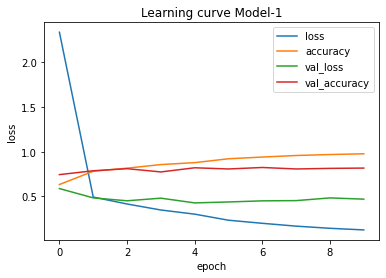

In [319]:
import pandas as pd
pd.DataFrame(food_model_hist1.history).plot(title='Learning curve Model-1',xlabel='epoch',ylabel='loss')

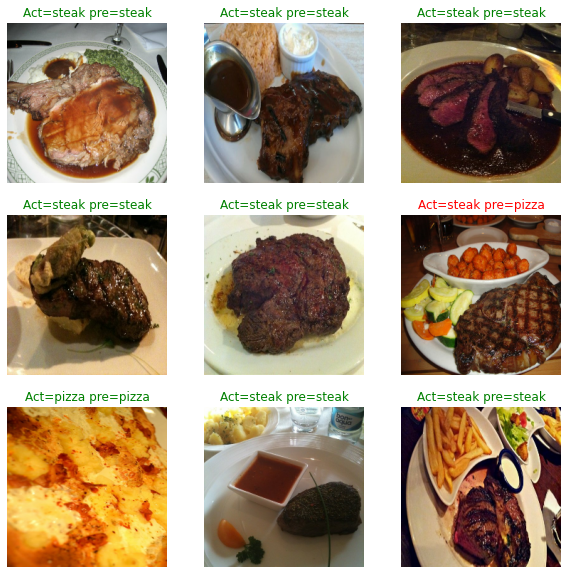

In [320]:
r=3
c=3
plt.figure(figsize=(10,10))
image,label=next(iter(test_ds))
for i in range(r*c):
  n=int(np.random.randint(0,32,1))
  ax=plt.subplot(r,c,i+1)
  plt.imshow(image[n,:,:,:].numpy().astype("uint8"))
  predicted_label=food_model_1.predict(image)
  index=int(np.max(np.round(predicted_label[n])))
  if labels[label[int(n)]]==labels[index]:
    plt.title('Act='+labels[label[int(n)]]+' pre='+labels[index],color="green")
  else:
    plt.title('Act='+labels[label[int(n)]]+' pre='+labels[index],color="red")
  plt.axis("off")

In [321]:
food_model_2=tf.keras.Sequential([
                                  Resizing_layer,
                                  Normalization_layer,
                                  tf.keras.layers.Conv2D(10,3,input_shape=(225,225,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(20,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [322]:
food_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.binary_crossentropy,metrics='accuracy')

In [323]:
food_model_callback2=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [324]:
food_model_hist2=food_model_2.fit(train_ds,batch_size=32,
                                  steps_per_epoch=trn_ds_len,
                                  validation_data=valid_ds,
                                  validation_steps=len(valid_ds),
                                  callbacks=food_model_callback2
                                  ,epochs=10)

Epoch 1/10
38/38 [==============================] - 5s 93ms/step - loss: 0.6919 - accuracy: 0.5300 - val_loss: 0.6784 - val_accuracy: 0.5233
Epoch 2/10
38/38 [==============================] - 4s 88ms/step - loss: 0.6167 - accuracy: 0.6717 - val_loss: 0.5476 - val_accuracy: 0.8167
Epoch 3/10
38/38 [==============================] - 4s 91ms/step - loss: 0.5053 - accuracy: 0.7625 - val_loss: 0.3802 - val_accuracy: 0.8300
Epoch 4/10
38/38 [==============================] - 4s 88ms/step - loss: 0.4615 - accuracy: 0.7925 - val_loss: 0.3607 - val_accuracy: 0.8567
Epoch 5/10
38/38 [==============================] - 4s 87ms/step - loss: 0.4351 - accuracy: 0.8000 - val_loss: 0.3621 - val_accuracy: 0.8567
Epoch 6/10
38/38 [==============================] - 3s 82ms/step - loss: 0.4333 - accuracy: 0.8100 - val_loss: 0.3568 - val_accuracy: 0.8533
Epoch 7/10
38/38 [==============================] - 4s 84ms/step - loss: 0.3946 - accuracy: 0.8242 - val_loss: 0.3644 - val_accuracy: 0.8533
Epoch 8/10
38

In [325]:
loss2,accuracy2=food_model_2.evaluate(test_ds)

16/16 [==============================] - 1s 37ms/step - loss: 0.3772 - accuracy: 0.8480


In [326]:
print('The accuracy of model-2 on test dataset', np.round(accuracy1*100,3))

The accuracy of model-2 on test dataset 83.6


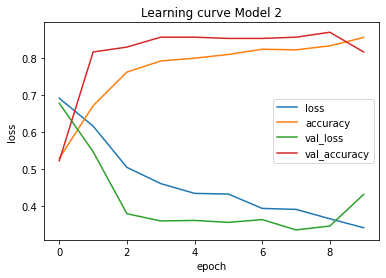

In [327]:
pd.DataFrame(food_model_hist2.history).plot(title='Learning curve Model 2',xlabel='epoch',ylabel='loss')

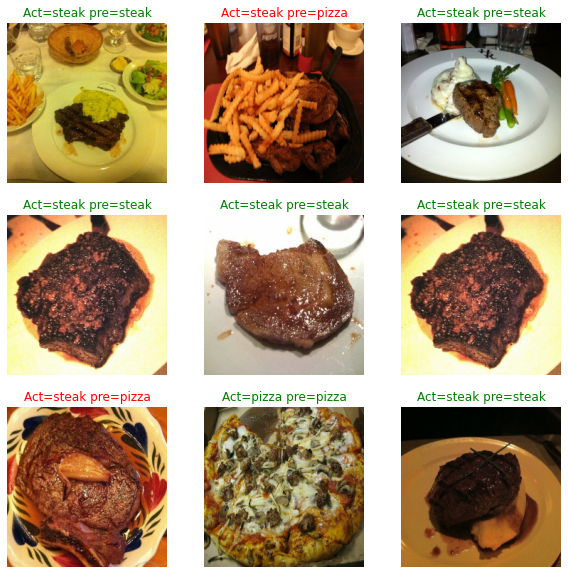

In [328]:
r=3
c=3
plt.figure(figsize=(10,10))
image,label=next(iter(test_ds))
for i in range(r*c):
  n=int(np.random.randint(0,32,1))
  ax=plt.subplot(r,c,i+1)
  plt.imshow(image[n,:,:,:].numpy().astype("uint8"))
  predicted_label=food_model_2.predict(image)
  index=int(np.max(np.round(predicted_label[n])))
  if labels[label[int(n)]]==labels[index]:
    plt.title('Act='+labels[label[int(n)]]+' pre='+labels[index],color="green")
  else:
    plt.title('Act='+labels[label[int(n)]]+' pre='+labels[index],color="red")
  plt.axis("off")

### Fitting our Model-2 with 87% accuracy on augumented data

In [329]:
food_model_agum_hist2=food_model_2.fit(trn_agument_ds,batch_size=32,
                                  steps_per_epoch=len(trn_agument_ds),
                                  validation_data=test_ds,
                                  validation_steps=len(test_ds),
                                  callbacks=food_model_callback2
                                  ,epochs=10)

Epoch 1/10
47/47 [==============================] - 25s 530ms/step - loss: 0.4273 - accuracy: 0.8067 - val_loss: 0.3488 - val_accuracy: 0.8640
Epoch 2/10
47/47 [==============================] - 25s 529ms/step - loss: 0.3928 - accuracy: 0.8347 - val_loss: 0.3350 - val_accuracy: 0.8700
Epoch 3/10
47/47 [==============================] - 24s 509ms/step - loss: 0.3810 - accuracy: 0.8427 - val_loss: 0.3085 - val_accuracy: 0.8800
Epoch 4/10
47/47 [==============================] - 26s 546ms/step - loss: 0.3731 - accuracy: 0.8307 - val_loss: 0.4499 - val_accuracy: 0.7900
Epoch 5/10
47/47 [==============================] - 24s 512ms/step - loss: 0.3763 - accuracy: 0.8327 - val_loss: 0.6656 - val_accuracy: 0.7000
Epoch 6/10
47/47 [==============================] - 24s 513ms/step - loss: 0.3780 - accuracy: 0.8373 - val_loss: 0.3149 - val_accuracy: 0.8760


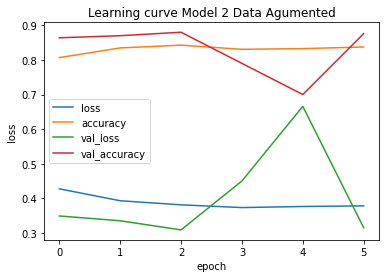

In [330]:
pd.DataFrame(food_model_agum_hist2.history).plot(title='Learning curve Model 2 Data Agumented',xlabel='epoch',ylabel='loss')

In [340]:
!wget https://www.delonghi.com/Global/recipes/multifry/pizza_fresca.jpg


--2021-08-11 10:28:15--  https://www.delonghi.com/Global/recipes/multifry/pizza_fresca.jpg
Resolving www.delonghi.com (www.delonghi.com)... 104.90.117.113
Connecting to www.delonghi.com (www.delonghi.com)|104.90.117.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘pizza_fresca.jpg’

pizza_fresca.jpg        [ <=>                ] 172.41K  --.-KB/s    in 0.03s   

2021-08-11 10:28:15 (6.54 MB/s) - ‘pizza_fresca.jpg’ saved [176552]



(-0.5, 1279.5, 879.5, -0.5)

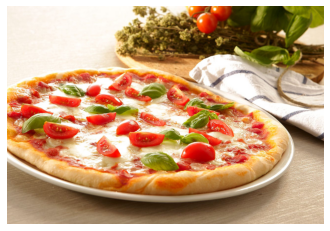

In [363]:
from matplotlib.image import imread
pizza=imread('./pizza_fresca.jpg')
plt.imshow(pizza)
plt.axis('off')

In [364]:
print('Shape of the image',pizza.shape)
pizza_re=tf.expand_dims(pizza,axis=0)
print('Reshaped image to fit out model',pizza_re.shape)

Shape of the image (880, 1280, 3)
Reshaped image to fit out model (1, 880, 1280, 3)


In [365]:
predicted_val=food_model_2.predict(pizza_re)

In [366]:
print(labels[int(predicted_val)])

pizza


In [382]:
!wget https://www.jessicagavin.com/wp-content/uploads/2018/06/how-to-reverse-sear-a-steak-11-1200.jpg

--2021-08-11 10:50:56--  https://www.jessicagavin.com/wp-content/uploads/2018/06/how-to-reverse-sear-a-steak-11-1200.jpg
Resolving www.jessicagavin.com (www.jessicagavin.com)... 141.193.213.21, 141.193.213.20
Connecting to www.jessicagavin.com (www.jessicagavin.com)|141.193.213.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107577 (105K) [image/jpeg]
Saving to: ‘how-to-reverse-sear-a-steak-11-1200.jpg’

how-to-reverse-sear 100%[===================>] 105.06K  --.-KB/s    in 0.02s   

2021-08-11 10:50:56 (6.22 MB/s) - ‘how-to-reverse-sear-a-steak-11-1200.jpg’ saved [107577/107577]



(-0.5, 767.5, 767.5, -0.5)

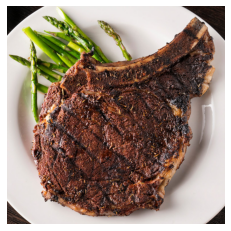

In [386]:
steak=imread('cinnamon_steak_rub_800-768x768.jpg')
plt.imshow(steak)
plt.axis('off')

In [387]:
steak_re=tf.expand_dims(steak,axis=0)
print(steak_re.shape)
predicted_steak=food_model_2.predict(steak_re)
print(labels[int(np.round(predicted_steak))])

(1, 768, 768, 3)
steak
